In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [4]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed5c4a5d13114591e5ee76b3bbaf9589


In [5]:
# Create a set of random latitude and longitude combinations. zip packs the data in pairs
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list. This command is unpacking the zip array into a tuple list, 
# you can only do this once as it then removes it from memory
coordinates = list(lat_lngs)

## 6.1.5

In [7]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

589

## 6.2.6

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city. city.replace(" ","+") takes out the spaces and concatonates the name together
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tra vinh
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | belyy yar
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | tuktoyaktuk
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | avera
Processing Record 9 of Set 1 | sitka
Processing Record 10 of Set 1 | clyde river
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | tiksi
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | krasnoselkup
Processing Record 15 of Set 1 | butaritari
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | vila franca do campo
Processing Record 19 of Set 1 | mar del plata
Processing Record 20 of Set 1 | east london
Processing Record 21 of Set 1 | prabumulih
Processing Record 22 of Set 1 | bluff
Processing Record 23 of Set 1 | 

Processing Record 35 of Set 4 | hami
Processing Record 36 of Set 4 | thabazimbi
Processing Record 37 of Set 4 | atbasar
Processing Record 38 of Set 4 | shu
Processing Record 39 of Set 4 | kaitangata
Processing Record 40 of Set 4 | kaabong
Processing Record 41 of Set 4 | manggar
Processing Record 42 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 43 of Set 4 | ponta delgada
Processing Record 44 of Set 4 | podor
Processing Record 45 of Set 4 | boyolangu
Processing Record 46 of Set 4 | hasaki
Processing Record 47 of Set 4 | wuwei
Processing Record 48 of Set 4 | nishihara
Processing Record 49 of Set 4 | san cristobal
Processing Record 50 of Set 4 | pocone
Processing Record 1 of Set 5 | sungairaya
Processing Record 2 of Set 5 | tianpeng
Processing Record 3 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 4 of Set 5 | akcakoca
Processing Record 5 of Set 5 | sinnamary
Processing Record 6 of Set 5 | adrar
Processing Record 7 of Set 5 | lorengau
Processing 

Processing Record 26 of Set 8 | nykobing
City not found. Skipping...
Processing Record 27 of Set 8 | abnub
Processing Record 28 of Set 8 | eskasem
City not found. Skipping...
Processing Record 29 of Set 8 | honningsvag
Processing Record 30 of Set 8 | sabzevar
Processing Record 31 of Set 8 | sukumo
Processing Record 32 of Set 8 | abu jubayhah
City not found. Skipping...
Processing Record 33 of Set 8 | san quintin
Processing Record 34 of Set 8 | pochutla
Processing Record 35 of Set 8 | riverton
Processing Record 36 of Set 8 | torbay
Processing Record 37 of Set 8 | bandarbeyla
Processing Record 38 of Set 8 | bubaque
Processing Record 39 of Set 8 | durban
Processing Record 40 of Set 8 | hamilton
Processing Record 41 of Set 8 | xining
Processing Record 42 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 43 of Set 8 | tadine
Processing Record 44 of Set 8 | tucuma
Processing Record 45 of Set 8 | antalaha
Processing Record 46 of Set 8 | tete
Processing Record 47 of Set 8 | sin

Processing Record 11 of Set 12 | bongandanga
Processing Record 12 of Set 12 | asheboro
Processing Record 13 of Set 12 | carnarvon
Processing Record 14 of Set 12 | corrente
Processing Record 15 of Set 12 | marsh harbour
Processing Record 16 of Set 12 | sile
Processing Record 17 of Set 12 | pringsewu
Processing Record 18 of Set 12 | magan
Processing Record 19 of Set 12 | bonfim
Processing Record 20 of Set 12 | mathbaria
Processing Record 21 of Set 12 | arlit
Processing Record 22 of Set 12 | betzdorf
Processing Record 23 of Set 12 | brufut
Processing Record 24 of Set 12 | maniitsoq
Processing Record 25 of Set 12 | palm harbor
Processing Record 26 of Set 12 | kismayo
Processing Record 27 of Set 12 | meulaboh
Processing Record 28 of Set 12 | xacmaz
Processing Record 29 of Set 12 | kidderminster
Processing Record 30 of Set 12 | edgemere
Processing Record 31 of Set 12 | kopyevo
City not found. Skipping...
Processing Record 32 of Set 12 | gao
Processing Record 33 of Set 12 | port lincoln
Proce

In [10]:
len(city_data)

534

## 6.2.7

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tra Vinh,9.9347,106.3453,78.94,84,97,9.28,VN,2022-04-05 13:35:26
1,Ushuaia,-54.8000,-68.3000,35.26,87,75,17.27,AR,2022-04-05 13:35:26
2,Belyy Yar,53.6039,91.3903,58.89,67,0,6.71,RU,2022-04-05 13:35:26
3,Rikitea,-23.1203,-134.9692,78.19,68,5,17.29,PF,2022-04-05 13:35:26
4,Tuktoyaktuk,69.4541,-133.0374,-14.80,70,75,5.75,CA,2022-04-05 13:35:27
5,Bethel,41.3712,-73.4140,48.63,68,100,0.00,US,2022-04-05 13:35:27
6,Busselton,-33.6500,115.3333,57.97,78,37,10.22,AU,2022-04-05 13:35:27
7,Avera,33.1940,-82.5271,60.85,78,65,12.77,US,2022-04-05 13:35:28
8,Sitka,57.0531,-135.3300,42.69,61,75,11.50,US,2022-04-05 13:31:14
9,Clyde River,70.4692,-68.5914,3.43,78,0,2.30,CA,2022-04-05 13:35:28


In [12]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tra Vinh,VN,2022-04-05 13:35:26,9.9347,106.3453,78.94,84,97,9.28
1,Ushuaia,AR,2022-04-05 13:35:26,-54.8000,-68.3000,35.26,87,75,17.27
2,Belyy Yar,RU,2022-04-05 13:35:26,53.6039,91.3903,58.89,67,0,6.71
3,Rikitea,PF,2022-04-05 13:35:26,-23.1203,-134.9692,78.19,68,5,17.29
4,Tuktoyaktuk,CA,2022-04-05 13:35:27,69.4541,-133.0374,-14.80,70,75,5.75
5,Bethel,US,2022-04-05 13:35:27,41.3712,-73.4140,48.63,68,100,0.00
6,Busselton,AU,2022-04-05 13:35:27,-33.6500,115.3333,57.97,78,37,10.22
7,Avera,US,2022-04-05 13:35:28,33.1940,-82.5271,60.85,78,65,12.77
8,Sitka,US,2022-04-05 13:31:14,57.0531,-135.3300,42.69,61,75,11.50
9,Clyde River,CA,2022-04-05 13:35:28,70.4692,-68.5914,3.43,78,0,2.30


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

## 6.3.1

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

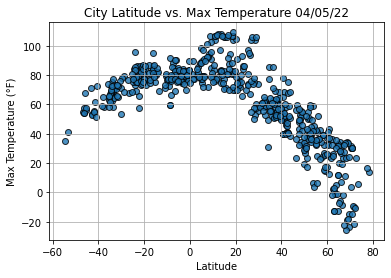

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

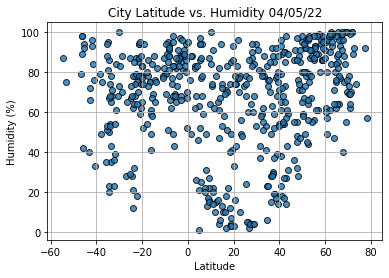

In [16]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

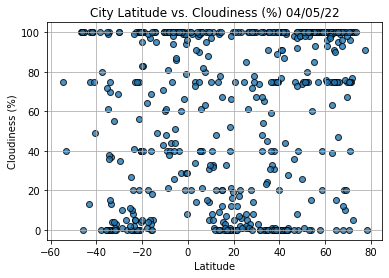

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

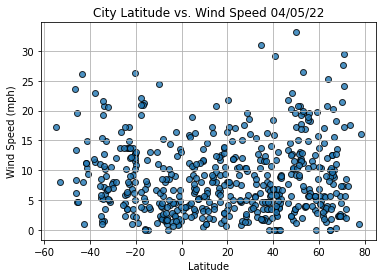

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
# Get a speciofic row from a data frame
index13 = city_data_df.loc[13]
index13

City                 Krasnoselkup
Country                        RU
Date          2022-04-05 13:35:29
Lat                          65.7
Lng                       82.4667
Max Temp                    34.09
Humidity                      100
Cloudiness                    100
Wind Speed                  12.59
Name: 13, dtype: object

In [22]:
## Filter data frame for northen hemisphere - Lattitude > 0
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tra Vinh,VN,2022-04-05 13:35:26,9.9347,106.3453,78.94,84,97,9.28
2,Belyy Yar,RU,2022-04-05 13:35:26,53.6039,91.3903,58.89,67,0,6.71
4,Tuktoyaktuk,CA,2022-04-05 13:35:27,69.4541,-133.0374,-14.80,70,75,5.75
5,Bethel,US,2022-04-05 13:35:27,41.3712,-73.4140,48.63,68,100,0.00
7,Avera,US,2022-04-05 13:35:28,33.1940,-82.5271,60.85,78,65,12.77


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

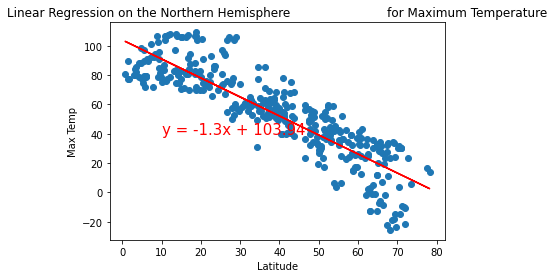

In [24]:
# Linear regression on the Northern Hemisphere ## Calls the function in cell 19
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

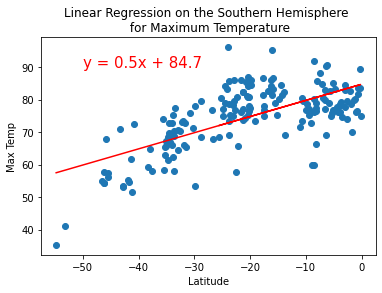

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

## 6.4.3

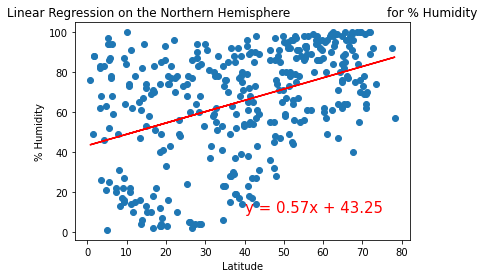

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

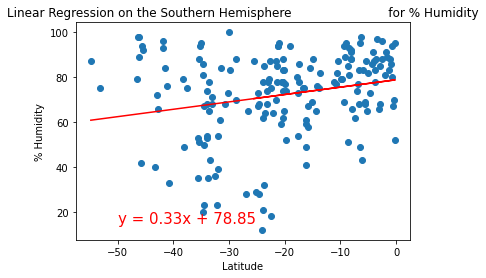

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

## 6.4.4

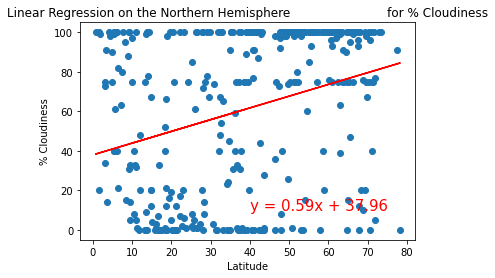

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

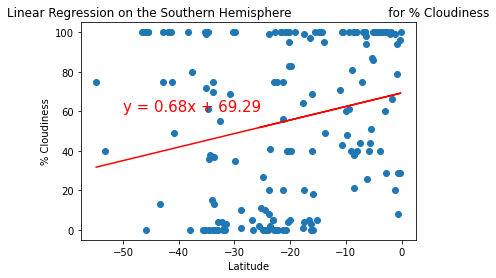

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

## 6.4.5

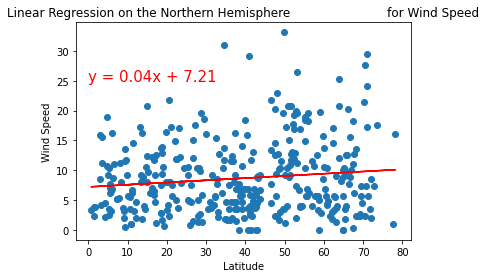

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(0,25))

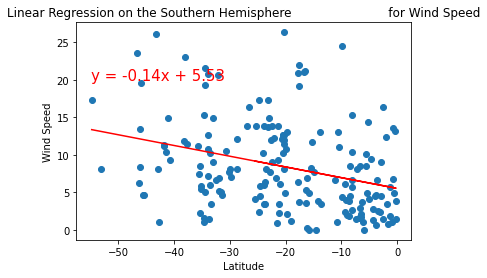

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-55,20))